In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# **Newton-Raphson method**
The Newton-Raphson method is a method of finding roots of a nonlinear function. Unlike the Bisection method, it falls under the category of **Open methods** due to the fact that we only need one initial guess that does not have to bracket the actual root.

In today's lab, we will be implementing the Newton-Raphson method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3+x-2$, then in python we will create an array as follows:

In [ ]:
f = [1,0,1,-2]

Note that your implementation should be able to handle the array `f` of any size, which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array `f` given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array `f` and a point `x` as input and evaluate the value of the function at that point x using a loop and return that value.

This function will be called in the other function that you will implement, which is as follows:
```
newtonraphson(f, x_init, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute Relative Approximate Error $|\epsilon_a|$ of at most epsilon (%). Note that, here epsilon is the Relative Error Tolerance $\epsilon_s$.

You will also need a function to calculate the derivative $f'(x)$ at some value of $x$.
```
derivative(f, x)
```

## Task 1: The Function

In [ ]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    # Write your code here
    val = f[0]*x*x*x + f[1]*x*x + f[2]*x + f[3]
    f = [1,0,1,-2]
    return val

In [ ]:
print(func(f,2))
print(func(f,3))
print(func(f,5))

8
28
128


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$8
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$128

## Task 2: The Derivative of the Function

In [ ]:
# Write a function for evaluating the derivative of the polynomial given by array f
def derivative(f, x):
  # Write your code here
    val = 0
    n = len(f) - 1
    # for i in range(len(f)):
        # val += f[i] * (len(f) - i - 1) * x**(len(f) - i - 2)

    for i in f:
      val += n * i * (x ** (n-1))
      n -= 1
      # if n == 0:
      #   break
    return val

In [ ]:
print(derivative(f,2))
print(derivative(f,3))
print(derivative(f,5))

13.0
28.0
76.0


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$13
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$76

## Task 3: The Algorithm
Now, its time to implement the whole algorithm. Take the initial guess as $2$, the Relative Error Tolerance $\epsilon_s$ as $0.01$, and the maximum number of iterations as $10000$.

In [ ]:
x_init = 2
epsilon = 0.01
MAX_ITERS=10000

iters = []
x = []
err = []
m = []

# Complete the following function
def newtonraphson(f, x_init, epsilon):
# Write your code here
  for i in range(MAX_ITERS):
    x.append(x_init)
    iters.append(i)
    x_next = (x_init - (func(f, x_init) / derivative(f, x_init)))
    e = abs(1 - x_init / x_next)
    err.append(e)
    sig_dig = math.floor(2 - math.log(2 * e))
    m.append(sig_dig)
    x_init = x_next
    if e <= epsilon:
      break;
  return x_next

In [ ]:
# Test your function here
print(newtonraphson(f, x_init, epsilon))

1.0000170707310327


The value should be very very close to $1$. (*e.g.* $1.0000170707310327$)<br>
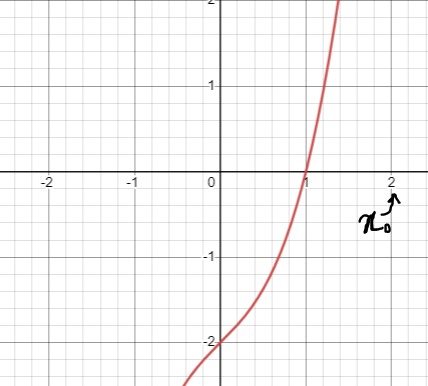

## Task 4: Plotting
In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

In [ ]:
# iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
# vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

# plt.plot(iters, vals)
# plt.title("Iterations vs values plot")
# plt.xlabel("Iteration")
# plt.ylabel("Value")
# plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_i)$ along the $Y$-axis.

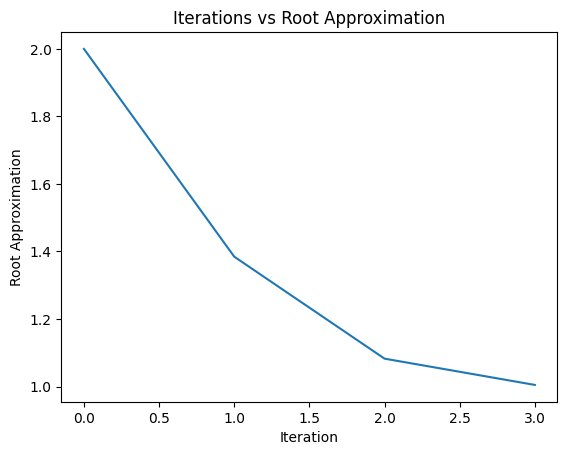

In [ ]:
plt.plot(iters, x)
plt.title("Iterations vs Root Approximation")
plt.xlabel("Iteration")
plt.ylabel("Root Approximation")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

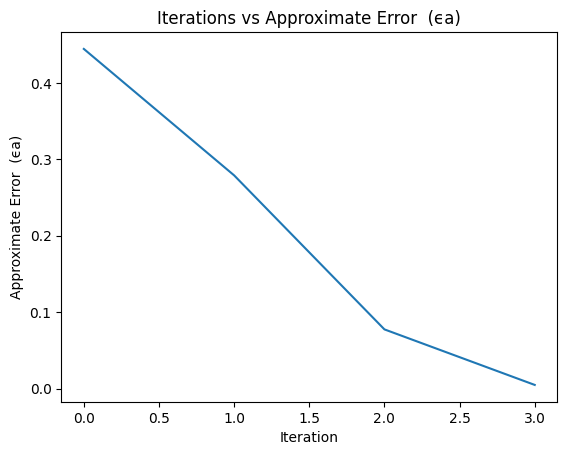

In [ ]:
plt.plot(iters, err)
plt.title("Iterations vs Approximate Error  (ϵa)")
plt.xlabel("Iteration")
plt.ylabel("Approximate Error  (ϵa)")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

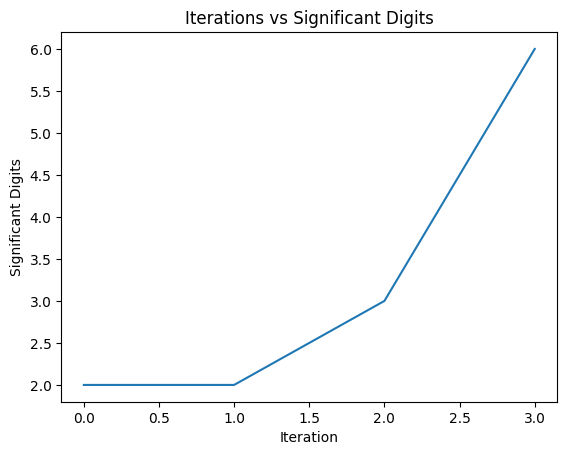

In [ ]:
plt.plot(iters, m)
plt.title("Iterations vs Significant Digits")
plt.xlabel("Iteration")
plt.ylabel("Significant Digits")
plt.show()